In [316]:
#import all libray function
from sklearn import datasets
import pandas as pd 
import numpy as np
import matplotlib.pyplot as splt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [317]:
#don't waring any method and proper run this code
import warnings
warnings.filterwarnings("ignore")

In [318]:
#Read the dataset
df=pd.read_csv("cardio_train.csv",sep=';')

In [319]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [320]:
#row and column
df.shape

(70000, 13)

In [321]:
#delete the id colunm
df=df.drop(['id'],axis=1)

In [322]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Duplicated value cheak

# Feature value counts

In [323]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: ylabel='count'>

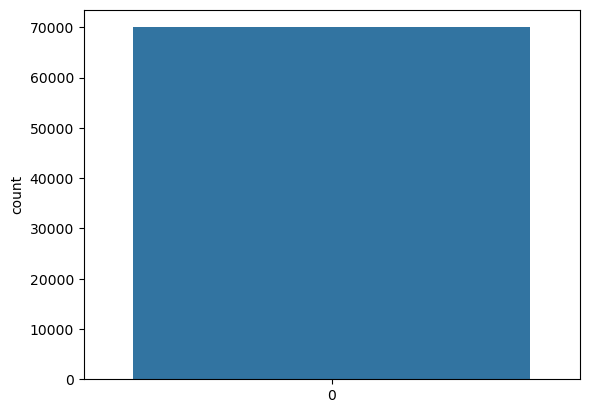

In [324]:
sns.countplot(df['cardio'])

In [325]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [326]:
df.isnull().values.any()

False

# Vizualization

<Axes: xlabel='gender', ylabel='count'>

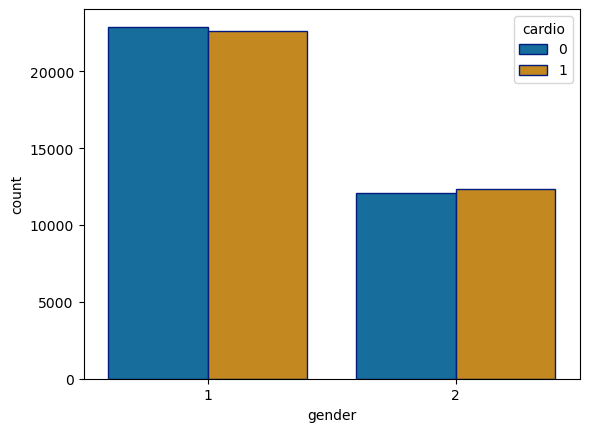

In [327]:
sns.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [328]:
#changing column age to year and round method uses this code
df['year']=(df['age']/365).round(0)

In [329]:
df['year']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: year, Length: 70000, dtype: float64

<Axes: xlabel='year', ylabel='count'>

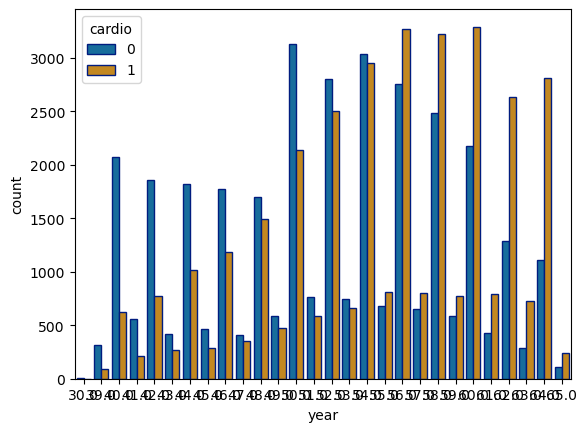

In [330]:
sns.countplot(x='year',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

<Axes: xlabel='weight', ylabel='count'>

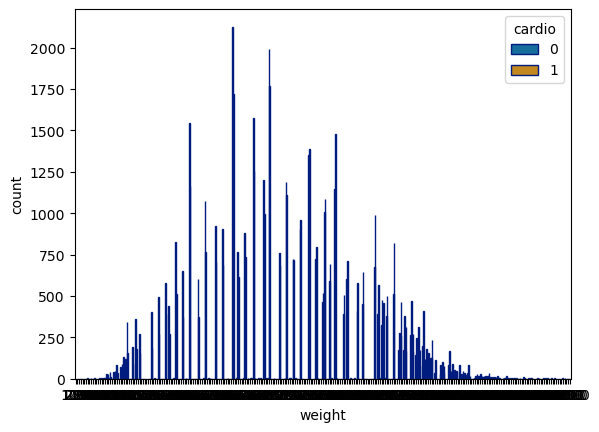

In [331]:
sns.countplot(x='weight',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

<Axes: xlabel='cholesterol', ylabel='count'>

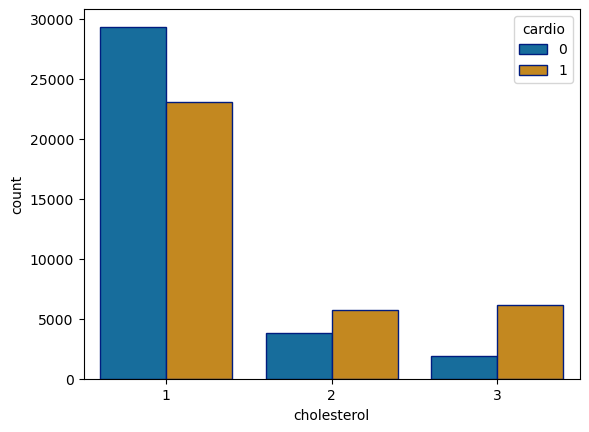

In [332]:
sns.countplot(x='cholesterol',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [333]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [334]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


In [335]:
x=df.iloc[:,:-1]

In [336]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [337]:
y=df.iloc[:,11]

In [338]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Train_Test_splite

In [339]:
#train_test_split
from sklearn.model_selection import train_test_split 

In [340]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)

In [341]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23561,16136,2,169,71.0,100,80,1,1,1,0,1,0
34858,14615,1,158,69.0,140,80,2,1,0,0,1,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1,0
59230,16720,1,153,53.0,100,60,1,1,0,0,1,0
1730,21050,1,159,71.0,140,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1,0
50057,21957,1,169,77.0,120,80,1,1,0,0,0,1


In [342]:
ytrain

23561    0
34858    1
54953    0
59230    0
1730     1
        ..
49100    1
20609    0
21440    0
50057    1
5192     1
Name: cardio, Length: 49000, dtype: int64

# Randam_Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier
Rclf=RandomForestClassifier()
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [344]:
Rclf.score(xtest,ytest)  

1.0

# Dessision_Tree

In [345]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [346]:
dtree.score(xtest,ytest)

1.0

# KNN

In [347]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [348]:
knn.score(xtest,ytest)

0.687

# Logistic Regression

In [349]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(xtrain,ytrain)

LogisticRegression()

In [350]:
logr.score(xtest,ytest)

0.9327142857142857

# Bagging Classifier

In [351]:
from sklearn.ensemble import BaggingClassifier

In [352]:
bagg = BaggingClassifier(n_estimators = 12)

In [353]:
bagg.fit(xtrain,ytrain)

BaggingClassifier(n_estimators=12)

In [354]:
bagg.score(xtest,ytest)

1.0

# AdaBoost Classifier

In [355]:
from sklearn.ensemble import AdaBoostClassifier

In [356]:
ada = AdaBoostClassifier(n_estimators=50)

In [357]:
ada.fit(xtrain, ytrain)

AdaBoostClassifier()

In [358]:
ada.score(xtest,ytest)

1.0

# Naive bayes classifier

In [359]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)

BernoulliNB()

In [360]:
bnb.score(xtest,ytest)

1.0

# Support Vector Machine

In [365]:
from sklearn.svm import SVC

In [366]:
sv=SVC(gamma='auto')

SVC(gamma='auto')

In [ ]:
sv.fit(xtrain, ytrain)

In [ ]:
sv.score(xtest,ytest)